In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 10

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 1,180
Trainable params: 1,180
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/7 [===>..........................] - ETA: 2s - loss: 2.3867 - accuracy: 0.0859
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 1s 46ms/step - loss: 2.3531 - accuracy: 0.1104 - val_loss: 2.2832 - val_accuracy: 0.1151
Epoch 2/1000
1/7 [===>..........................] - ETA: 0s - loss: 2.3773 - accuracy: 0.0781
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 2.3150 - accuracy: 0.1140 - val_loss: 2.2700 - val_accuracy: 0.1475
Epoch 3/1000
1/7 [===>..........................] - ETA: 0s - loss: 2.2865 - accuracy: 0.1094
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 2.2840 - accuracy: 0.1128 - val_loss: 2.2622 - val_accuracy: 0.1691
Epoch 4/1000
1/7 [===>..........................] - ETA: 0s - loss: 2.2524 - accuracy: 0.1172
Epoch 4: savin

7/7 [==============================] - 0s 8ms/step - loss: 1.6142 - accuracy: 0.3842 - val_loss: 1.4626 - val_accuracy: 0.4856
Epoch 29/1000
1/7 [===>..........................] - ETA: 0s - loss: 1.6340 - accuracy: 0.3750
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 1.6037 - accuracy: 0.4034 - val_loss: 1.4356 - val_accuracy: 0.5288
Epoch 30/1000
1/7 [===>..........................] - ETA: 0s - loss: 1.5783 - accuracy: 0.4062
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 1.5611 - accuracy: 0.4058 - val_loss: 1.4141 - val_accuracy: 0.5360
Epoch 31/1000
1/7 [===>..........................] - ETA: 0s - loss: 1.6629 - accuracy: 0.3828
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 1.5710 - accuracy: 0.3902 - val_loss: 1.3947

Epoch 56/1000
1/7 [===>..........................] - ETA: 0s - loss: 1.1309 - accuracy: 0.5703
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 1.2512 - accuracy: 0.5258 - val_loss: 1.0504 - val_accuracy: 0.7086
Epoch 57/1000
1/7 [===>..........................] - ETA: 0s - loss: 1.2587 - accuracy: 0.5078
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 1.2393 - accuracy: 0.4946 - val_loss: 1.0379 - val_accuracy: 0.7194
Epoch 58/1000
1/7 [===>..........................] - ETA: 0s - loss: 1.2903 - accuracy: 0.5234
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 1.2397 - accuracy: 0.5498 - val_loss: 1.0192 - val_accuracy: 0.7086
Epoch 59/1000
1/7 [===>..........................] - ETA: 0s - loss: 1.1306 - accuracy: 0.5781
Epoch 59

7/7 [==============================] - 0s 9ms/step - loss: 1.0511 - accuracy: 0.5942 - val_loss: 0.7866 - val_accuracy: 0.7518
Epoch 84/1000
1/7 [===>..........................] - ETA: 0s - loss: 1.0663 - accuracy: 0.5625
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 1.0561 - accuracy: 0.5834 - val_loss: 0.7759 - val_accuracy: 0.7482
Epoch 85/1000
1/7 [===>..........................] - ETA: 0s - loss: 1.0639 - accuracy: 0.6016
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 1.0528 - accuracy: 0.6038 - val_loss: 0.7711 - val_accuracy: 0.7626
Epoch 86/1000
1/7 [===>..........................] - ETA: 0s - loss: 1.0181 - accuracy: 0.6484
Epoch 86: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 1.0216 - accuracy: 0.6303 - val_loss: 0.7602

Epoch 111/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.9236 - accuracy: 0.6797
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.9125 - accuracy: 0.6411 - val_loss: 0.6407 - val_accuracy: 0.8129
Epoch 112/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.9467 - accuracy: 0.6641
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.9417 - accuracy: 0.6291 - val_loss: 0.6381 - val_accuracy: 0.8129
Epoch 113/1000
1/7 [===>..........................] - ETA: 0s - loss: 1.0043 - accuracy: 0.6094
Epoch 113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.9602 - accuracy: 0.6375 - val_loss: 0.6322 - val_accuracy: 0.8237
Epoch 114/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.8462 - accuracy: 0.7188
E

1/7 [===>..........................] - ETA: 0s - loss: 0.8632 - accuracy: 0.6094
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.8978 - accuracy: 0.6495 - val_loss: 0.5576 - val_accuracy: 0.8309
Epoch 139/1000
1/7 [===>..........................] - ETA: 0s - loss: 1.1287 - accuracy: 0.6016
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.9073 - accuracy: 0.6567 - val_loss: 0.5635 - val_accuracy: 0.8309
Epoch 140/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.8450 - accuracy: 0.7266
Epoch 140: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.8701 - accuracy: 0.6687 - val_loss: 0.5619 - val_accuracy: 0.8345
Epoch 141/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.9084 - accuracy: 0.6875
Epoch 141: savin

1/7 [===>..........................] - ETA: 0s - loss: 0.8979 - accuracy: 0.6562
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.8221 - accuracy: 0.6855 - val_loss: 0.5033 - val_accuracy: 0.8381
Epoch 166/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.8179 - accuracy: 0.6484
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.8219 - accuracy: 0.6867 - val_loss: 0.5036 - val_accuracy: 0.8381
Epoch 167/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.7982 - accuracy: 0.6953
Epoch 167: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.8213 - accuracy: 0.6987 - val_loss: 0.5039 - val_accuracy: 0.8417
Epoch 168/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.6734 - accuracy: 0.7656
Epoch 168: savin

1/7 [===>..........................] - ETA: 0s - loss: 0.7301 - accuracy: 0.6953
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.7779 - accuracy: 0.6903 - val_loss: 0.4726 - val_accuracy: 0.8381
Epoch 193/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.6295 - accuracy: 0.7500
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.7729 - accuracy: 0.7047 - val_loss: 0.4704 - val_accuracy: 0.8417
Epoch 194/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.7227 - accuracy: 0.7266
Epoch 194: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.7893 - accuracy: 0.6963 - val_loss: 0.4718 - val_accuracy: 0.8525
Epoch 195/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.8263 - accuracy: 0.6875
Epoch 195: savin

1/7 [===>..........................] - ETA: 0s - loss: 0.7079 - accuracy: 0.6484
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.7709 - accuracy: 0.6891 - val_loss: 0.4474 - val_accuracy: 0.8453
Epoch 220/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.8146 - accuracy: 0.6875
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.7636 - accuracy: 0.6999 - val_loss: 0.4462 - val_accuracy: 0.8669
Epoch 221/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.7545 - accuracy: 0.7344
Epoch 221: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.7284 - accuracy: 0.7311 - val_loss: 0.4449 - val_accuracy: 0.8561
Epoch 222/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.7665 - accuracy: 0.6797
Epoch 222: savin

1/7 [===>..........................] - ETA: 0s - loss: 0.7976 - accuracy: 0.7031
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.7560 - accuracy: 0.7023 - val_loss: 0.4328 - val_accuracy: 0.8633
Epoch 247/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.7594 - accuracy: 0.6719
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.7389 - accuracy: 0.7215 - val_loss: 0.4325 - val_accuracy: 0.8633
Epoch 248/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.7829 - accuracy: 0.6875
Epoch 248: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.7490 - accuracy: 0.6987 - val_loss: 0.4311 - val_accuracy: 0.8633
Epoch 249/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.7948 - accuracy: 0.6641
Epoch 249: savin

1/7 [===>..........................] - ETA: 0s - loss: 0.6433 - accuracy: 0.7344
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.7508 - accuracy: 0.6999 - val_loss: 0.4189 - val_accuracy: 0.8849
Epoch 274/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.8462 - accuracy: 0.6484
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.7207 - accuracy: 0.7251 - val_loss: 0.4253 - val_accuracy: 0.8705
Epoch 275/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.5663 - accuracy: 0.7969
Epoch 275: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.7301 - accuracy: 0.7275 - val_loss: 0.4267 - val_accuracy: 0.8669
Epoch 276/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.7909 - accuracy: 0.7188
Epoch 276: savin

1/7 [===>..........................] - ETA: 0s - loss: 0.7211 - accuracy: 0.7734
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.6765 - accuracy: 0.7623 - val_loss: 0.4008 - val_accuracy: 0.8849
Epoch 301/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.5151 - accuracy: 0.8047
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.6719 - accuracy: 0.7419 - val_loss: 0.3995 - val_accuracy: 0.8849
Epoch 302/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.7519 - accuracy: 0.7422
Epoch 302: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.6799 - accuracy: 0.7515 - val_loss: 0.3985 - val_accuracy: 0.8849
Epoch 303/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.6532 - accuracy: 0.7422
Epoch 303: savin

1/7 [===>..........................] - ETA: 0s - loss: 0.6291 - accuracy: 0.7500
Epoch 327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.6702 - accuracy: 0.7611 - val_loss: 0.3811 - val_accuracy: 0.8921
Epoch 328/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.6021 - accuracy: 0.7891
Epoch 328: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.6710 - accuracy: 0.7455 - val_loss: 0.3801 - val_accuracy: 0.8957
Epoch 329/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.7610 - accuracy: 0.7188
Epoch 329: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.6901 - accuracy: 0.7407 - val_loss: 0.3826 - val_accuracy: 0.8957
Epoch 330/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.6413 - accuracy: 0.7422
Epoch 330: savin

1/7 [===>..........................] - ETA: 0s - loss: 0.6261 - accuracy: 0.7734
Epoch 354: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.6500 - accuracy: 0.7515 - val_loss: 0.3741 - val_accuracy: 0.8849
Epoch 355/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.5749 - accuracy: 0.7969
Epoch 355: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.6293 - accuracy: 0.7683 - val_loss: 0.3793 - val_accuracy: 0.8885
Epoch 356/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.6556 - accuracy: 0.7266
Epoch 356: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.6650 - accuracy: 0.7467 - val_loss: 0.3806 - val_accuracy: 0.8921
Epoch 357/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.6901 - accuracy: 0.7344
Epoch 357: savin

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 2ms/step - loss: 0.3774 - accuracy: 0.8921


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 66ms/step
[3.3173354e-05 9.5864496e-05 5.8304727e-07 7.0809443e-07 6.4553419e-08
 8.0920708e-01 1.5934912e-02 6.0766198e-02 1.1381005e-01 1.5135662e-04]
5


# Confusion matrix

In [15]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

9/9 [==============================] - 0s 940us/step


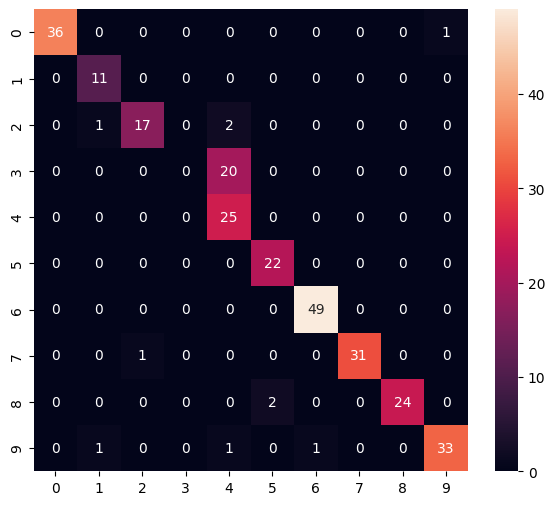

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.85      1.00      0.92        11
           2       0.94      0.85      0.89        20
           3       0.00      0.00      0.00        20
           4       0.52      1.00      0.68        25
           5       0.92      1.00      0.96        22
           6       0.98      1.00      0.99        49
           7       1.00      0.97      0.98        32
           8       1.00      0.92      0.96        26
           9       0.97      0.92      0.94        36

    accuracy                           0.89       278
   macro avg       0.82      0.86      0.83       278
weighted avg       0.86      0.89      0.87       278



C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\lpzan\AppData\Local\Temp\tmp53rh8tpy\assets


6808

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.31733863e-05 9.58643941e-05 5.83047267e-07 7.08093012e-07
 6.45532978e-08 8.09207022e-01 1.59349181e-02 6.07661866e-02
 1.13810144e-01 1.51356624e-04]
5
